In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
#import matplotlib.pyplot as plt
#import numpy as np
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
#import dataset
df = pd.read_csv('car_dataset.csv')
df.head(n=5)

,Unnamed: 0,make,model,year,owner,transmission,fuel,engine,max_power,seats,km_driven,seller_type,price_category
0,0,Maruti,Swift,2014,First Owner,Manual,Diesel,1248 CC,74 bhp,5.0,145500,Individual,Medium
1,1,Skoda,Rapid,2014,Second Owner,Manual,Diesel,1498 CC,103.52 bhp,5.0,120000,Individual,Medium
2,2,Honda,City,2006,Third Owner,Manual,Petrol,1497 CC,78 bhp,5.0,140000,Individual,Low
3,3,Hyundai,i20,2010,First Owner,Manual,Diesel,1396 CC,90 bhp,5.0,127000,Individual,Low
4,4,Maruti,Swift,2007,First Owner,Manual,Petrol,1298 CC,88.2 bhp,5.0,120000,Individual,Low


In [295]:
#To explore dataset using descriptive statistics(mean,std,max,min)
df.describe()

,Unnamed: 0,year,seats,km_driven
count,8128.000000,8128.000000,7907.000000,8.128000e+03
mean,4063.500000,2013.804011,5.416719,6.981951e+04
std,2346.495827,4.044249,0.959588,5.655055e+04
min,0.000000,1983.000000,2.000000,1.000000e+00
25%,2031.750000,2011.000000,5.000000,3.500000e+04
50%,4063.500000,2015.000000,5.000000,6.000000e+04
75%,6095.250000,2017.000000,5.000000,9.800000e+04
max,8127.000000,2020.000000,14.000000,2.360457e+06


In [296]:
#Check for missing values
df.isnull()
df['max_power'] = df['max_power'].str.replace(' bhp', '')
df['max_power'] = df['max_power'].replace(r'^\s*$', np.nan, regex=True)
df = df.dropna()
pd.unique(df['max_power'].values)

array(['74', '103.52', '78', '90', '88.2', '81.86', '57.5', '37', '67.1',
       '68.1', '108.45', '60', '73.9', '67', '82', '88.5', '46.3',
       '88.73', '64.1', '98.6', '88.8', '83.81', '83.1', '47.3', '73.8',
       '34.2', '35', '81.83', '40.3', '121.3', '138.03', '160.77',
       '117.3', '116.3', '83.14', '67.05', '168.5', '100', '120.7',
       '98.63', '175.56', '103.25', '171.5', '100.6', '174.33', '187.74',
       '170', '78.9', '88.76', '86.8', '108.495', '108.62', '93.7',
       '103.6', '98.59', '189', '67.04', '68.05', '58.2', '82.85',
       '81.80', '73', '120', '94.68', '160', '65', '155', '69.01',
       '126.32', '138.1', '83.8', '126.2', '98.96', '62.1', '86.7', '188',
       '214.56', '177', '280', '148.31', '254.79', '190', '177.46', '204',
       '141', '117.6', '241.4', '282', '150', '147.5', '108.5', '103.5',
       '183', '181.04', '157.7', '164.7', '91.1', '400', '68', '75',
       '85.8', '87.2', '53', '118', '103.2', '83', '84', '58.16',
       '147.94', 

In [297]:
#Removing units
df['engine'] = df['engine'].str.replace(' CC', '')
#df['max_power'] = df['max_power'].str.replace(' bhp', '')
df.head(n=5)

,Unnamed: 0,make,model,year,owner,transmission,fuel,engine,max_power,seats,km_driven,seller_type,price_category
0,0,Maruti,Swift,2014,First Owner,Manual,Diesel,1248,74,5.0,145500,Individual,Medium
1,1,Skoda,Rapid,2014,Second Owner,Manual,Diesel,1498,103.52,5.0,120000,Individual,Medium
2,2,Honda,City,2006,Third Owner,Manual,Petrol,1497,78,5.0,140000,Individual,Low
3,3,Hyundai,i20,2010,First Owner,Manual,Diesel,1396,90,5.0,127000,Individual,Low
4,4,Maruti,Swift,2007,First Owner,Manual,Petrol,1298,88.2,5.0,120000,Individual,Low


In [298]:
df['year'] = df['year'].astype(float)
df['engine'] = df['engine'].astype(float)
df['max_power'] = df['max_power'].astype(float)
df['km_driven'] = df['km_driven'].astype(float)
df['make'] = df['make'].astype('category')
df['model'] = df['model'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [299]:
#converting cc to litres
df['engine'] = df['engine'].apply(lambda x: x*0.001)
df['engine'] = df['engine'].apply(lambda x: x*1.013)
df.head(n=5)

,Unnamed: 0,make,model,year,owner,transmission,fuel,engine,max_power,seats,km_driven,seller_type,price_category
0,0,20,152,2014.0,First Owner,Manual,Diesel,1.264224,74.00,5.0,145500.0,Individual,Medium
1,1,26,126,2014.0,Second Owner,Manual,Diesel,1.517474,103.52,5.0,120000.0,Individual,Medium
2,2,10,35,2006.0,Third Owner,Manual,Petrol,1.516461,78.00,5.0,140000.0,Individual,Low
3,3,11,196,2010.0,First Owner,Manual,Diesel,1.414148,90.00,5.0,127000.0,Individual,Low
4,4,20,152,2007.0,First Owner,Manual,Petrol,1.314874,88.20,5.0,120000.0,Individual,Low


In [300]:
#Changing categorical features to numerical values
#Maruti = 0, Skoda =1, Honda =2, Hyundai =3
#Swift = 0, Rapid =1, City =2, i20 =3
#First owner = 0 , SO =1, TO =2
#Manual=0, Diesel =0, Petrol =1, Individual =0, Med =1, Low=0

#f['make'] = df['make'].apply(lambda x: 0 if x == 'Maruti' else 1 if x == 'Skoda' else 2 if x =='Honda' else 3 if x == 'Ambassador' else 4 if x == 'Ashok' else if x == 'Audi el
#f['model'] = df['model'].apply(lambda x: 0 if x == 'Swift' else 1 if x == 'Rapid' else 2 if x =='City' else 3)
df['owner'] = df['owner'].apply(lambda x: 0 if x == 'First Owner' else 1 if x == 'Second Owner' else 2 if x == 'Third Owner' else 3 if x == 'Fourth & Above Owner' else 4)
df['transmission'] = df['transmission'].apply(lambda x: 0 if x == 'Manual' else 1 if x =='Automatic' else 2)
df['fuel'] = df['fuel'].apply(lambda x: 0 if x == 'Diesel' else 1 if x == 'Petrol' else 2)
df['seller_type'] = df['seller_type'].apply(lambda x: 0 if x == 'Individual' else 1 if x =='Dealer' else 2 if x =='Trustmark Dealer' else 3)
df['price_category'] = df['price_category'].apply(lambda x: 0 if x == 'Low' else 1 if x == 'Medium' else 2 if x =='High' else 3)
df.head()

,Unnamed: 0,make,model,year,owner,transmission,fuel,engine,max_power,seats,km_driven,seller_type,price_category
0,0,20,152,2014.0,0,0,0,1.264224,74.00,5.0,145500.0,0,1
1,1,26,126,2014.0,1,0,0,1.517474,103.52,5.0,120000.0,0,1
2,2,10,35,2006.0,2,0,1,1.516461,78.00,5.0,140000.0,0,0
3,3,11,196,2010.0,0,0,0,1.414148,90.00,5.0,127000.0,0,0
4,4,20,152,2007.0,0,0,1,1.314874,88.20,5.0,120000.0,0,0


In [301]:
# Drop the Unnamed, make and model column as it is not needed for the model training
df_ = df.copy()
df = df_.drop(['Unnamed: 0'], axis=1)
#df = df_.drop(['make'], axis=1)
#df = df_.drop(['model'], axis=1)
# Check for missing values
df.isnull().sum()

# Print count of Unique values of each column
for col in df.columns:
    print(col, df[col].nunique())

make 31
model 197
year 27
owner 5
transmission 2
fuel 3
engine 121
max_power 318
seats 9
km_driven 898
seller_type 3
price_category 3


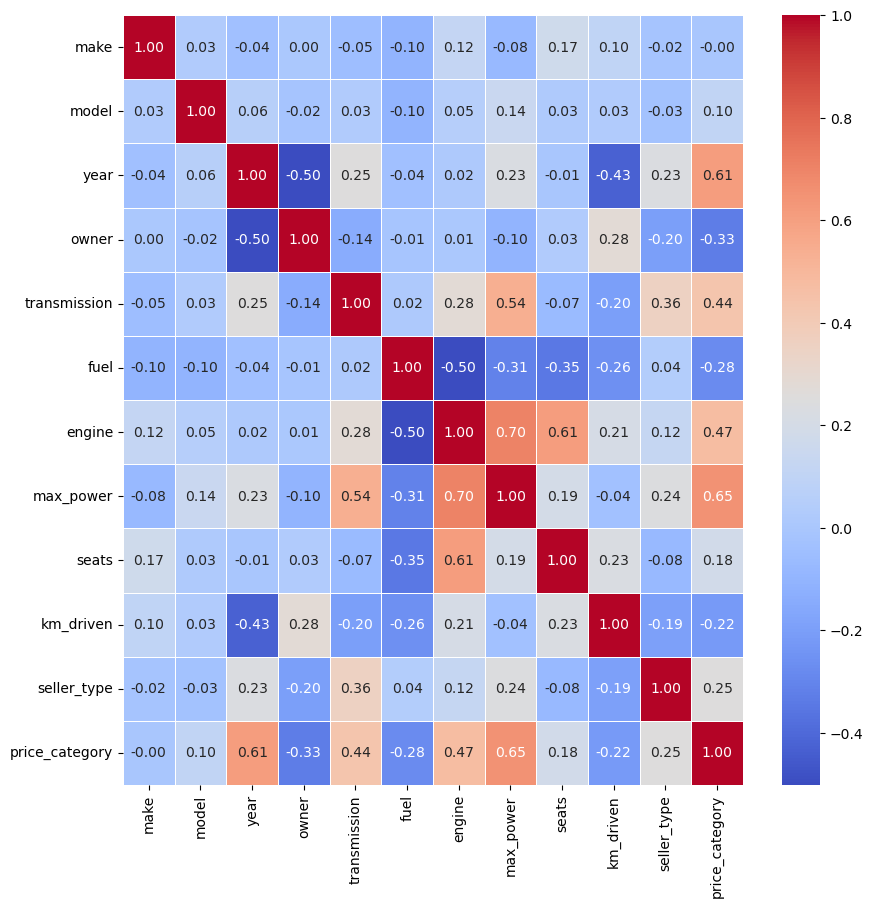

In [302]:
# The correlation matrix 

corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.show()


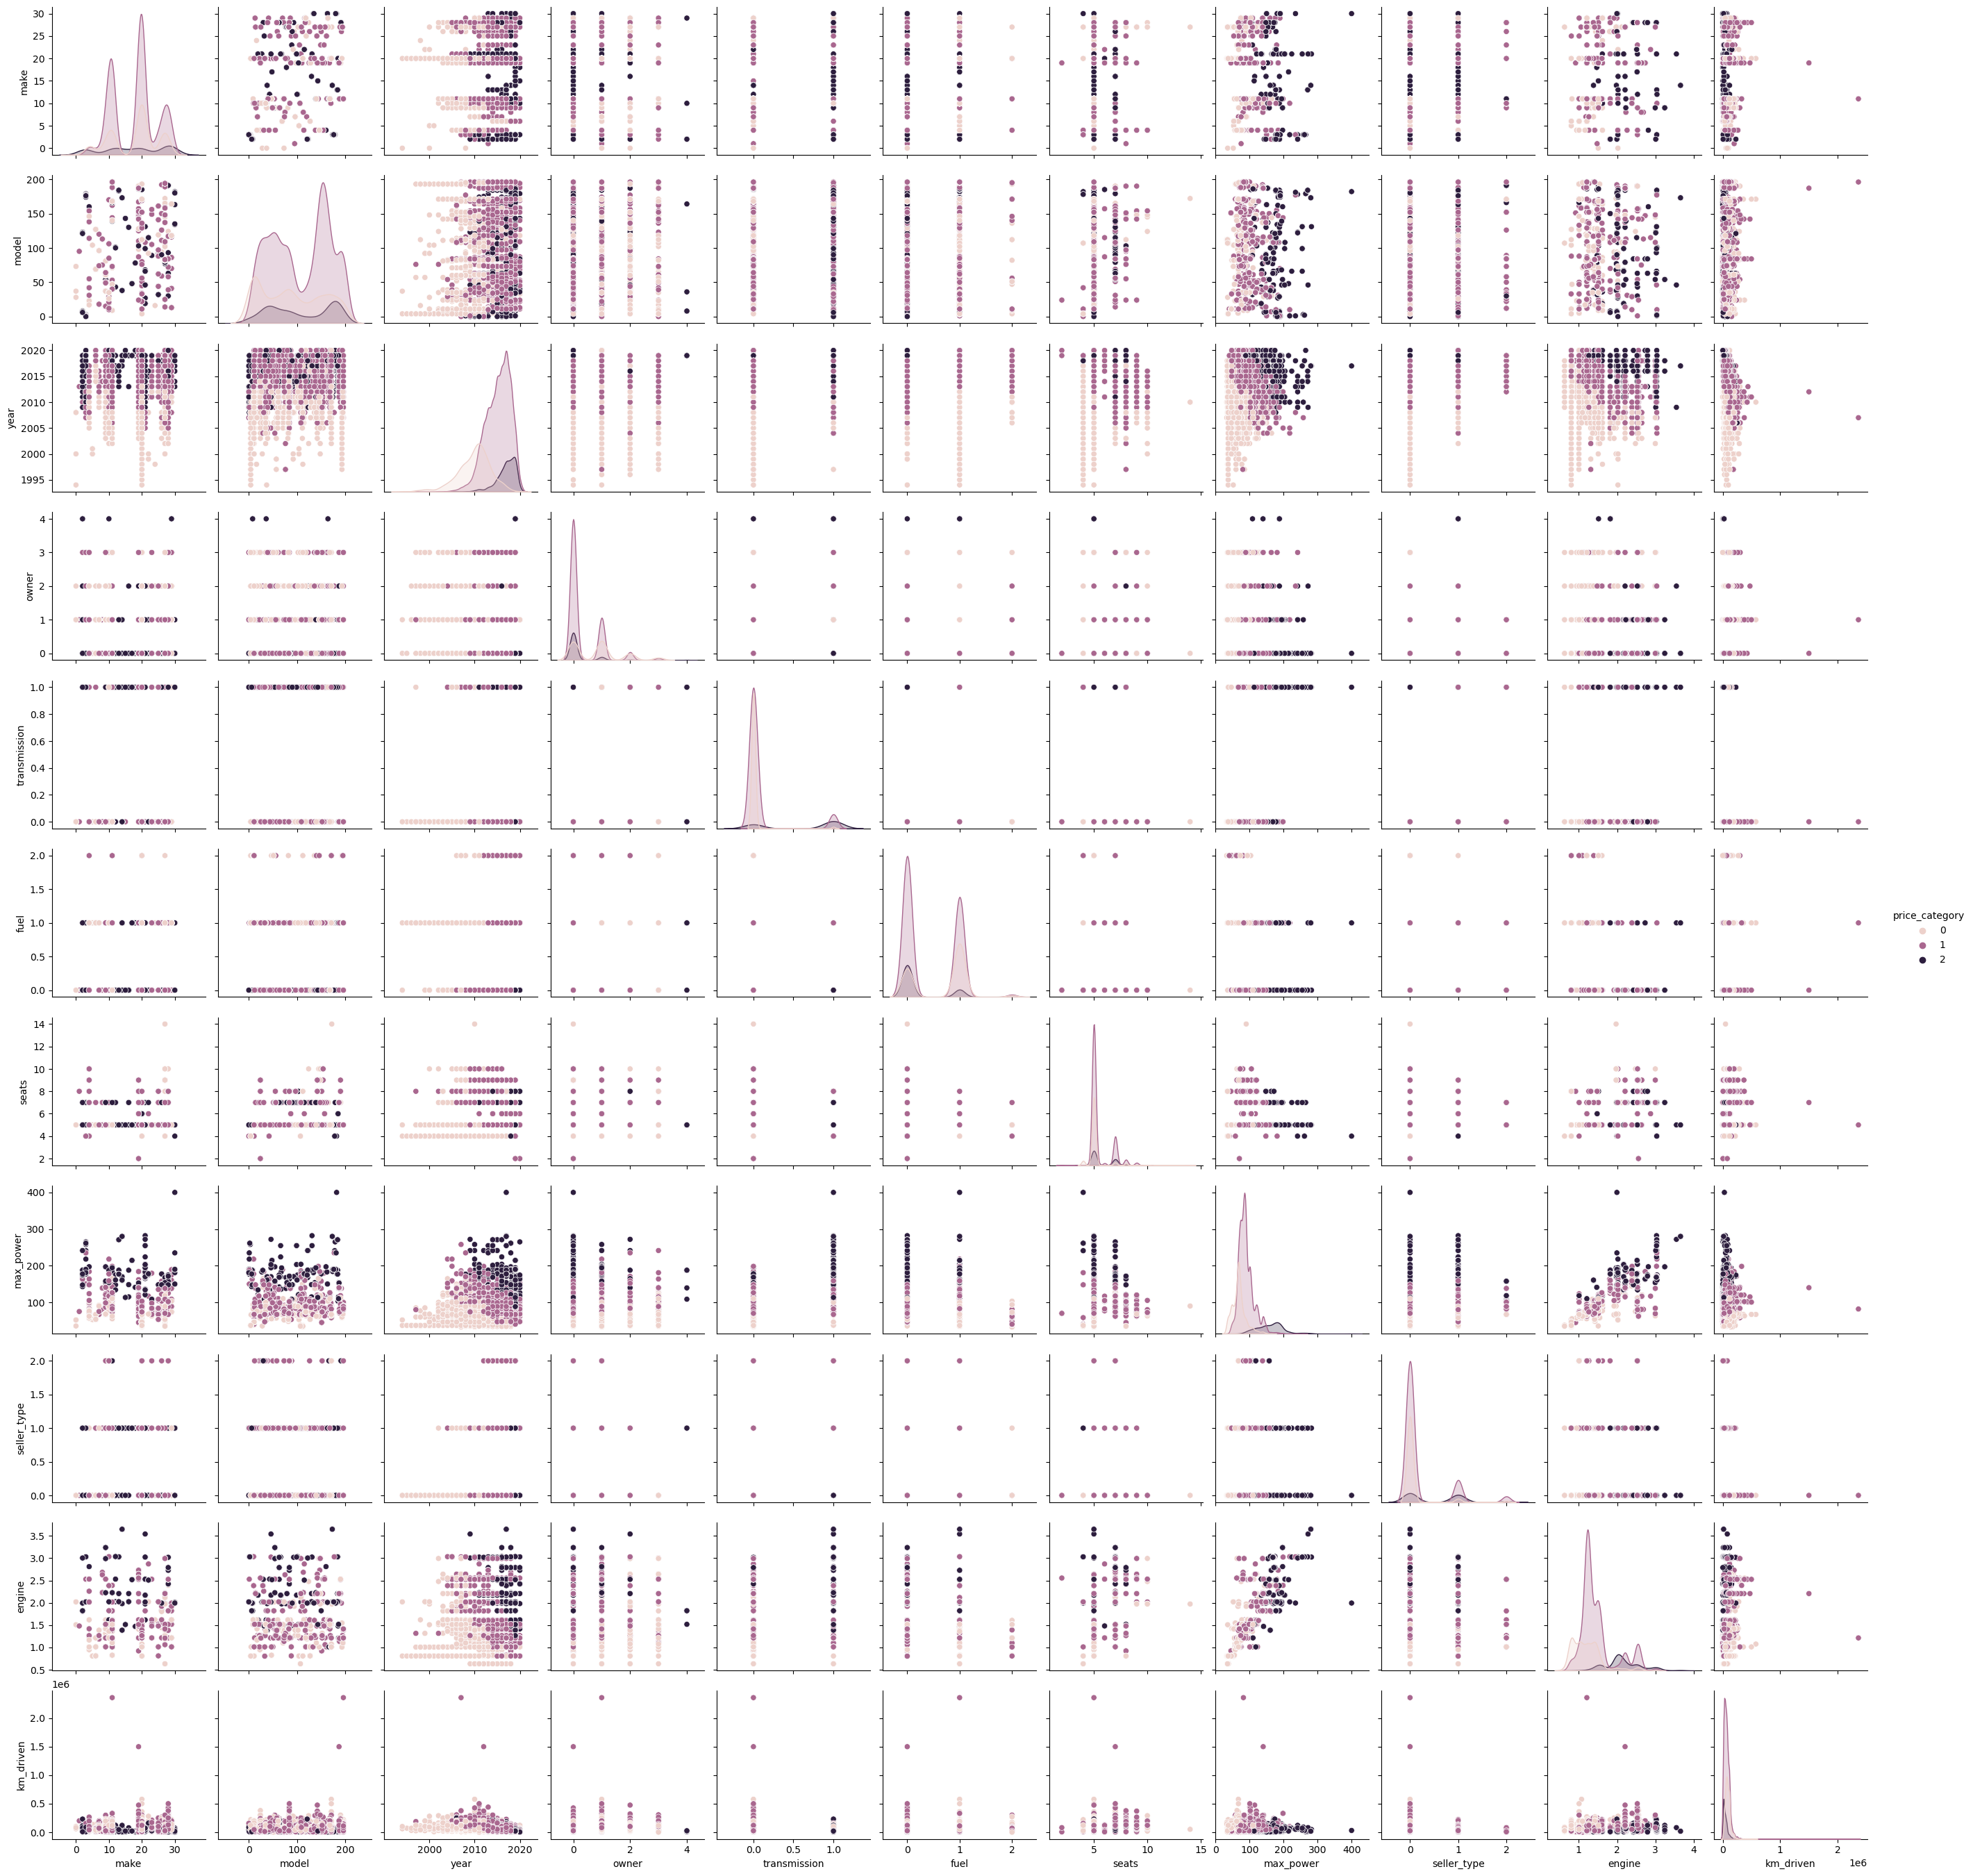

In [305]:
# Data and their correlations with the target variable using scatter plot
numeric_cols = ['make','model','year', 'owner','transmission','fuel','seats','max_power','seller_type','engine','km_driven','price_category']
sns.pairplot(df.loc[:,numeric_cols],hue="price_category",diag_kind='kde',kind='scatter')
plt.show()

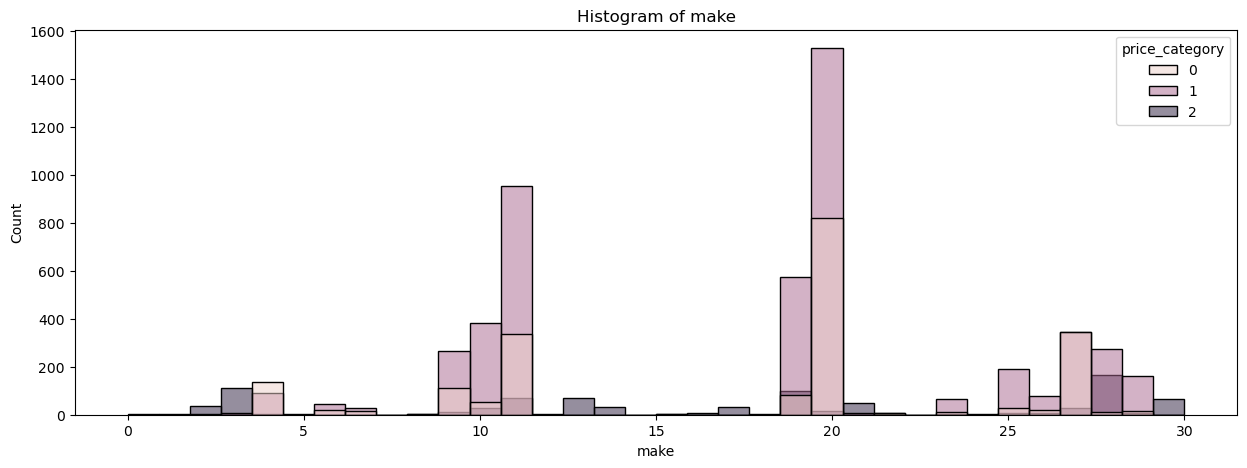

In [306]:
#Bar plot of categorical data
#for make
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.set_title('Histogram of make')
sns.histplot(data=df, x='make', hue='price_category')
plt.show()

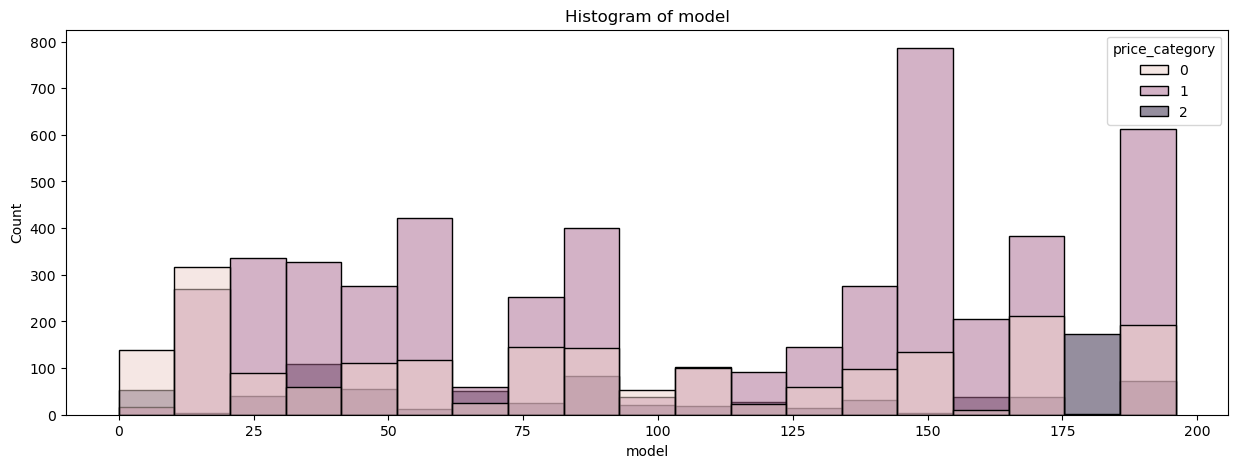

In [307]:
#for model
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.set_title('Histogram of model')
sns.histplot(data=df, x='model', hue='price_category')
plt.show()

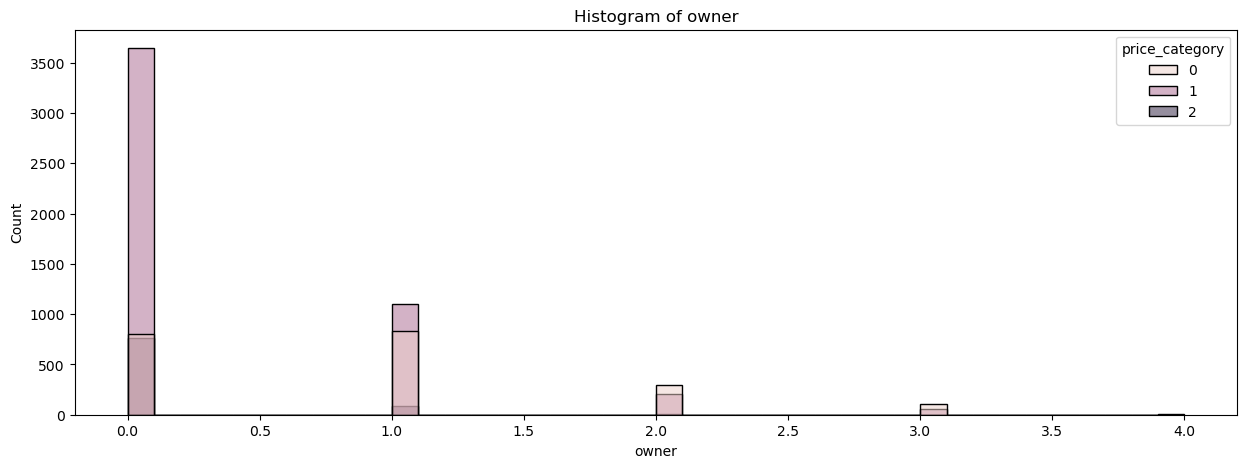

In [308]:
#for owner
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.set_title('Histogram of owner')
sns.histplot(data=df, x='owner', hue='price_category')
plt.show()


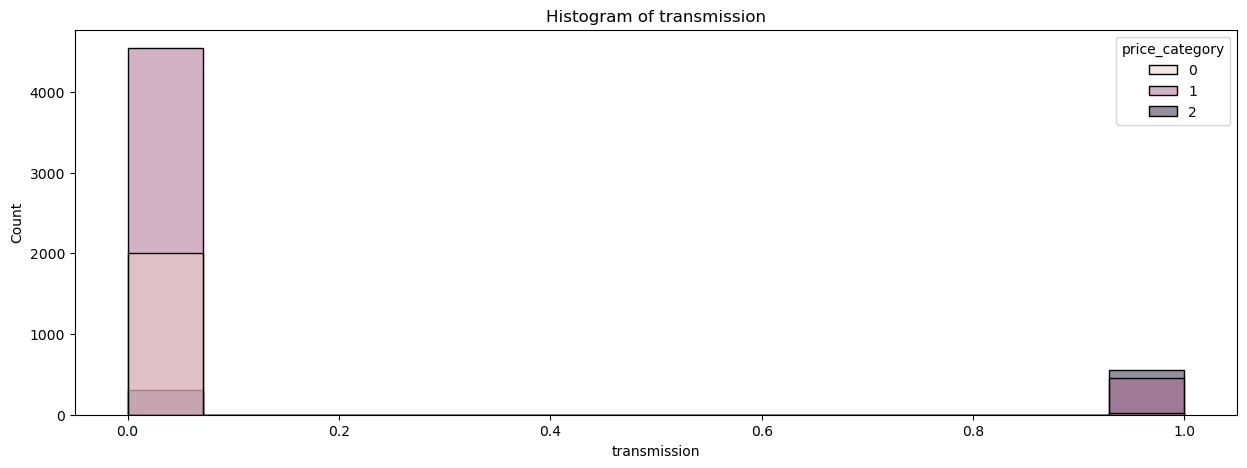

In [309]:
#for transmission
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.set_title('Histogram of transmission')
sns.histplot(data=df, x='transmission', hue='price_category')
plt.show()


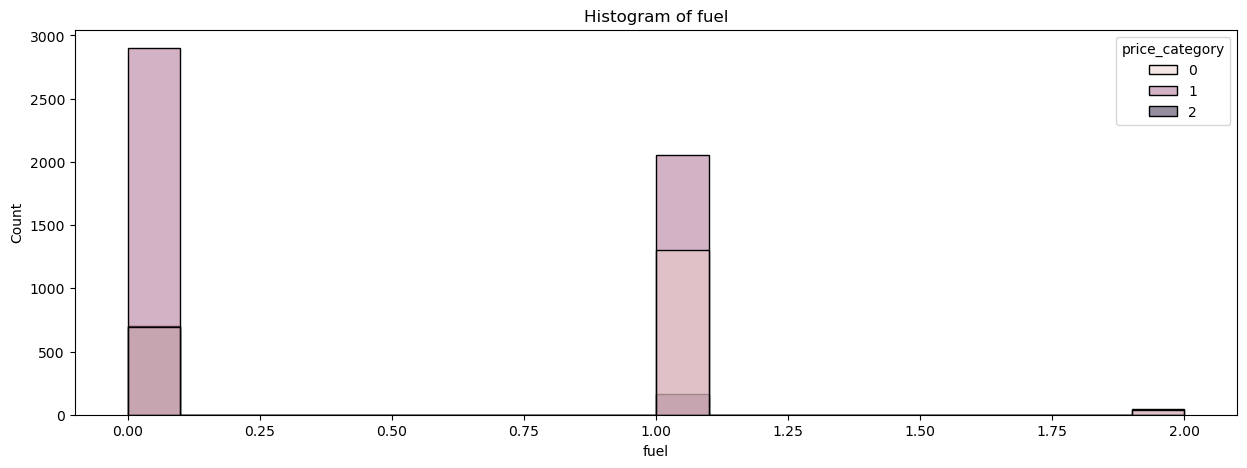

In [310]:
#for fuel
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.set_title('Histogram of fuel')
sns.histplot(data=df, x='fuel', hue='price_category')
plt.show()

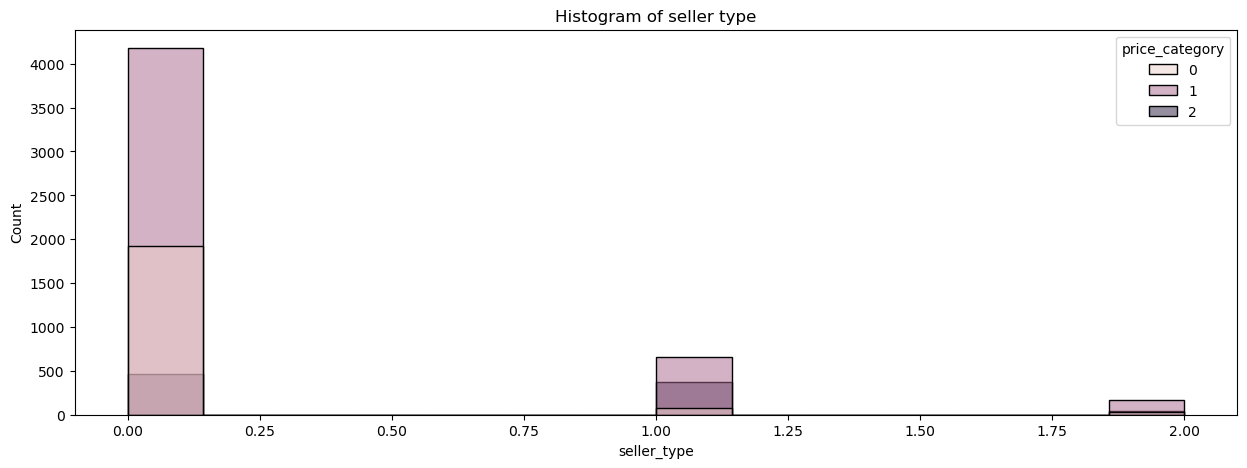

In [311]:
#for seller type
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.set_title('Histogram of seller type')
sns.histplot(data=df, x='seller_type', hue='price_category')
plt.show()

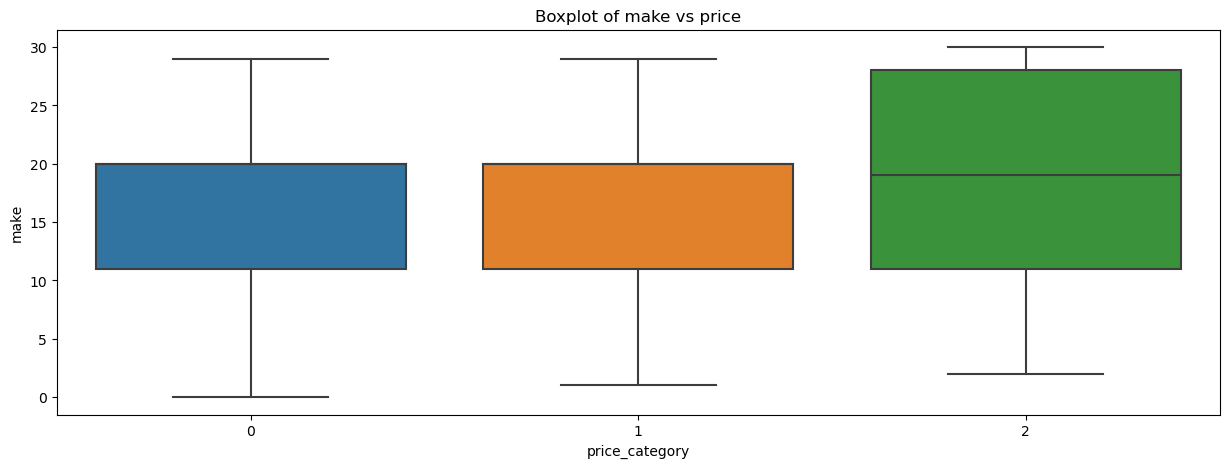

In [312]:
#Boxplots to find outliers
#the dots represent outliers
#for make
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.set_title('Boxplot of make vs price')
sns.boxplot(data=df, x="price_category", y="make")
#sns.histplot(data=df, x='seller_type', hue='price_category', ax=ax[1])
plt.show()

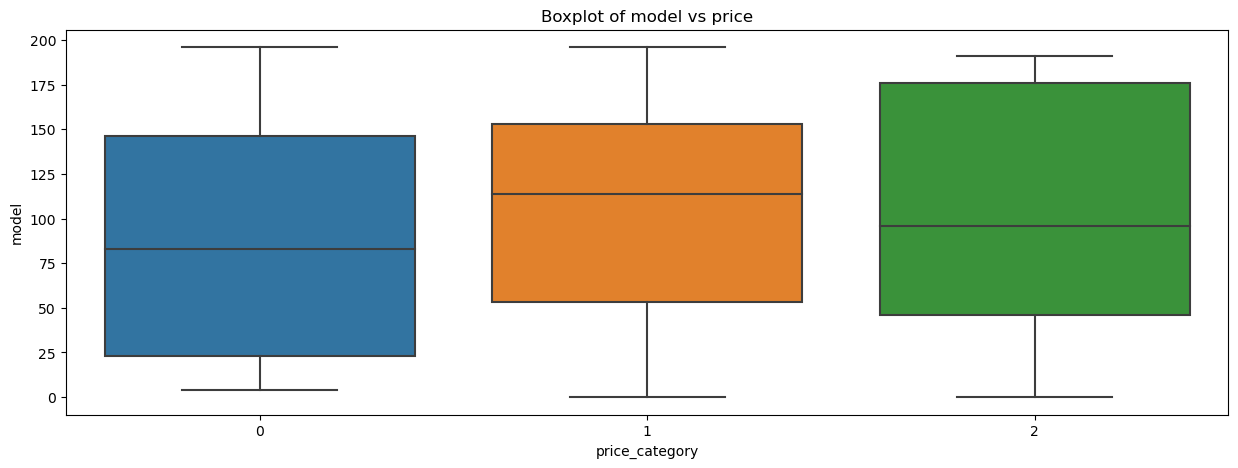

In [313]:
#for model
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.set_title('Boxplot of model vs price')
sns.boxplot(data=df, x="price_category", y="model")
#sns.histplot(data=df, x='seller_type', hue='price_category', ax=ax[1])
plt.show()

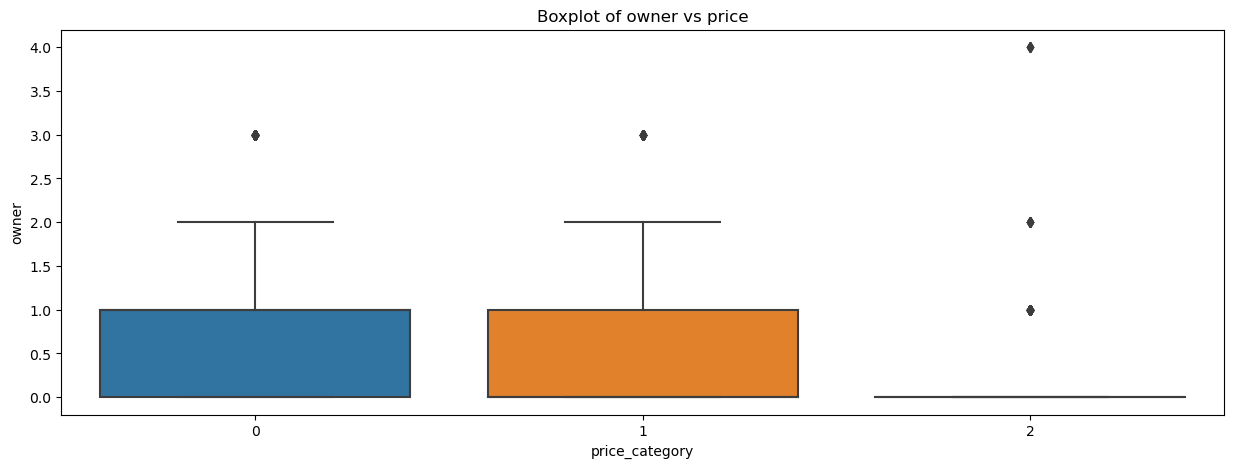

In [314]:
#for owner
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.set_title('Boxplot of owner vs price')
sns.boxplot(data=df, x="price_category", y="owner")
#sns.histplot(data=df, x='seller_type', hue='price_category', ax=ax[1])
plt.show()
# we can see the first and second owners have outliers and it implies skewed distribution

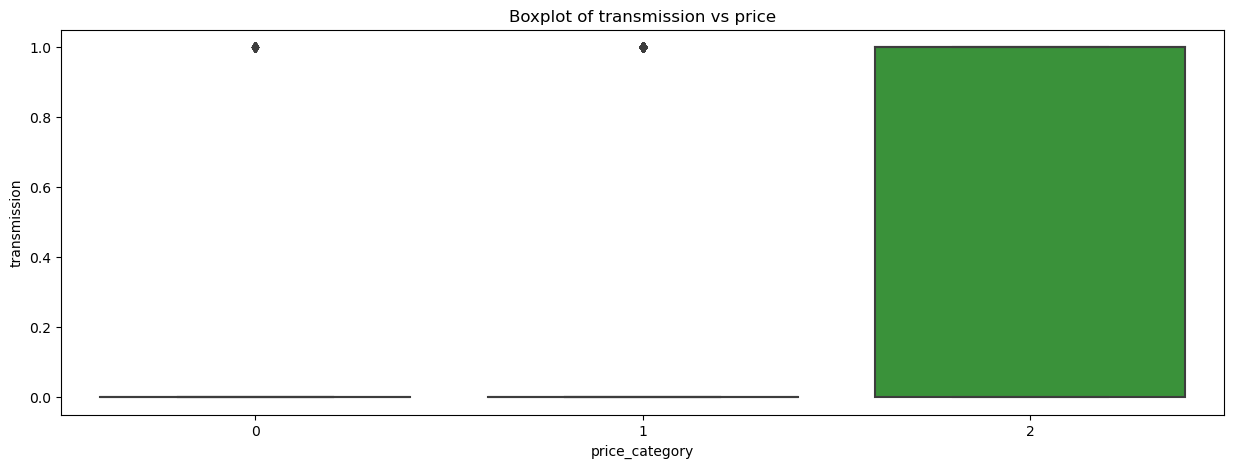

In [315]:
#for transmission
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.set_title('Boxplot of transmission vs price')
sns.boxplot(data=df, x="price_category", y="transmission")
#sns.histplot(data=df, x='seller_type', hue='price_category', ax=ax[1])
plt.show()

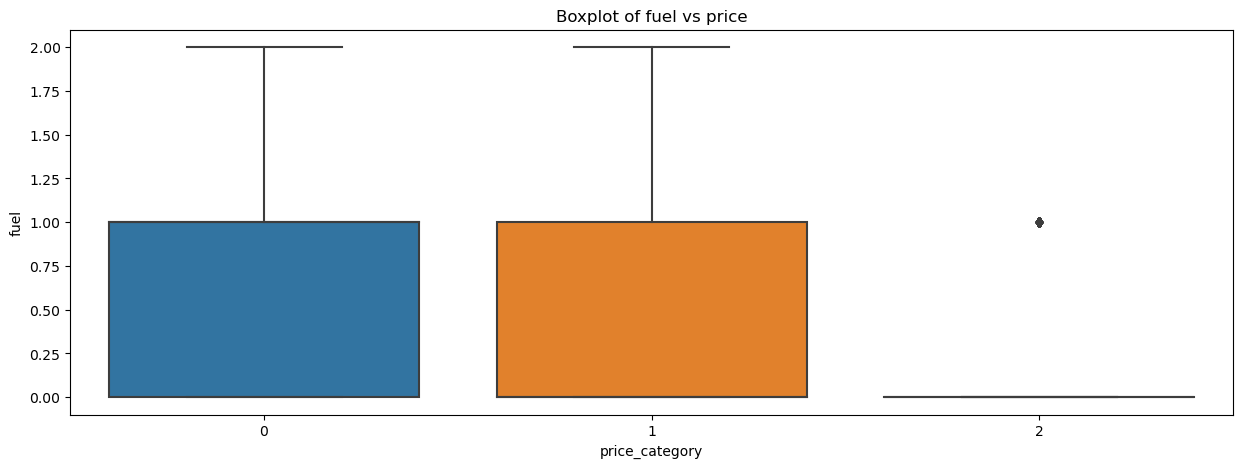

In [316]:
#for fuel
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.set_title('Boxplot of fuel vs price')
sns.boxplot(data=df, x="price_category", y="fuel")
#sns.histplot(data=df, x='seller_type', hue='price_category', ax=ax[1])
plt.show()

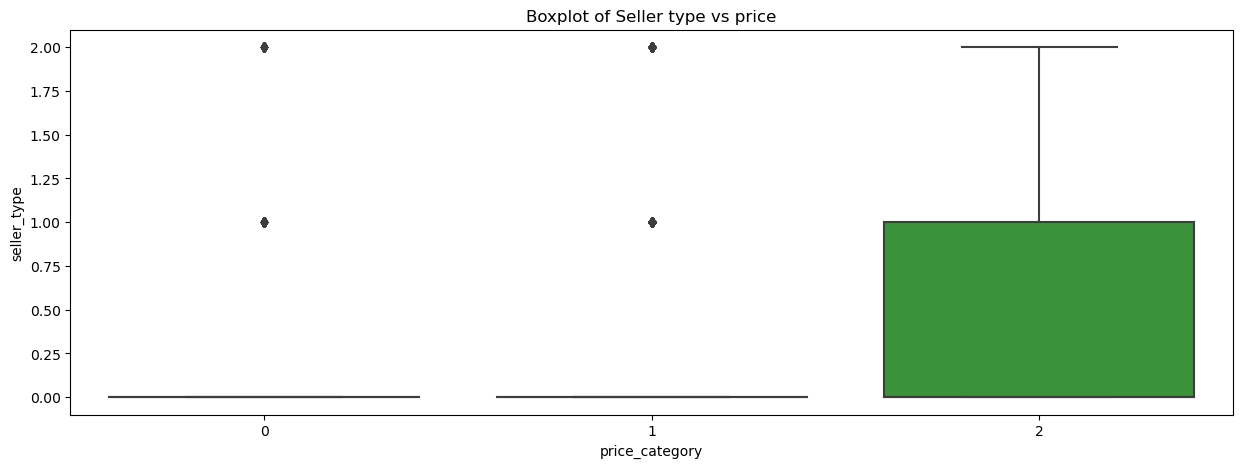

In [317]:
#for seller type
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.set_title('Boxplot of Seller type vs price')
sns.boxplot(data=df, x="price_category", y="seller_type")
#sns.histplot(data=df, x='seller_type', hue='price_category', ax=ax[1])
plt.show()

In [327]:
#Feature selection
#removing fuel as a feature
X = df.drop(['fuel','owner','price_category'], axis=1)
y = df['price_category']

#Splitting data and Standerdizing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 # Print the shapes of the training and testing sets and top 5 rows of the training set , X_train, y_train and X_test, y_test
print("----Training Data ----")
print(X_train.shape, y_train.shape)
print("----Test Data ----")
print(X_test.shape, y_test.shape)

for i in range(5):
    print("Training Set:", X_train[i], y_train.iloc[i])
    print("Testing Set:", X_test[i], y_test.iloc[i])
    



    

----Training Data ----
(5534, 9) (5534,)
----Test Data ----
(2372, 9) (2372,)
Training Set: [ 0.30961752 -1.48518895 -1.79171586 -0.38704343 -1.32065032 -1.27058643
 -0.43126381  0.34241867 -0.4311334 ] 0
Testing Set: [-1.10398149 -1.09372241  0.00813086 -0.38704343  0.07304541  0.19963649
 -0.43126381  1.50038686 -0.4311334 ] 1
Training Set: [ 0.30961752  1.12458795 -1.02035298 -0.38704343 -0.91961537 -0.68587062
 -0.43126381  0.84861619 -0.4311334 ] 0
Testing Set: [ 0.30961752 -1.59936669 -2.04883682 -0.38704343 -1.32065032 -1.53202186
 -1.46532532 -0.48470147 -0.4311334 ] 0
Training Set: [ 0.30961752 -0.83274472  1.29373565 -0.38704343 -0.5265217  -0.52001373
  1.63685919 -1.06368556 -0.4311334 ] 1
Testing Set: [ 0.30961752  0.16223272  0.52237278 -0.38704343 -1.32065032 -1.6107336
  2.6709207  -0.37376812  1.71638438] 0
Training Set: [ 1.58185664 -0.26185603  0.52237278  2.58368937  1.00614655  1.3080665
 -0.43126381  0.45821549 -0.4311334 ] 2
Testing Set: [ 1.29913683 -0.32710045 

Tuned Hyperparameters : {'C': 0.5, 'penalty': 'l1'}
Accuracy : 86.21264319936749
Training Accuracy    : 86.16 %
Model Accuracy Score : 87.56 %
Model Accuracy score on testing set using roc_auc : 95.26 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.87      0.76      0.81       609
           1       0.87      0.94      0.91      1516
           2       0.91      0.75      0.82       247

    accuracy                           0.88      2372
   macro avg       0.88      0.82      0.85      2372
weighted avg       0.88      0.88      0.87      2372

--------------------------------------------------------
Confusion Matrix


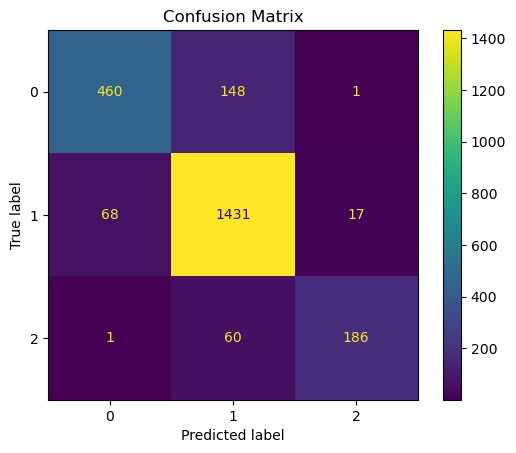

In [328]:
#Training data by Logistic Regrssion
lr = LogisticRegression(solver='liblinear', random_state=0).fit(X_train,y_train)

# lr : Logistic Regression model  , y_pred_lr : Predicted values of y_test 
#Tuning
param_grid = {'penalty' : ['l1','l2'],'C': [0.1, 0.5, 1, 2, 5] }
clf = GridSearchCV(lr, param_grid)
clf.fit(X_train, y_train)
#Tuned parameters accuracy
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_*100)
# Evaluation metrics

y_pred_lr = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)
log_train = round(lr.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)
roc = round(roc_auc_score(y_test,y_pred_prob,multi_class='ovr')*100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("Model Accuracy score on testing set using roc_auc :", roc,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr,zero_division=0))
print("\033[1m--------------------------------------------------------\033[0m")

print('Confusion Matrix')
cm = confusion_matrix(y_test, y_pred_lr)
cm
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.title('Confusion Matrix')
plt.show()